#1. Naive-Bayes Text Categorization (5pt)

In this problem, you are to work on a text classification problem by using the same data provided for Problem 3 in Assignment 4. Your goal is to classify each text article into one of the  4  categories by using a multi-class Naive-Bayes model rather than using multi-class SVMs. If you use a Bernoulli Naive-Bayes model, the class label for a document that consists of n different word types is given by the following expressions:

p(y=k|x1,...,xn)=p(x1,...,xn|y=k)p(y=k)p(x1,...,xn) 
∝p(y=k)p(x1,...,xn|y=k) 
=p(y=k)Πnj=1p(xj|y=k). 

It means that if a document contains the  j -th word ( xj ) at least once (among its  n  unique words out of  |V|  vocabulary), then that information can be used to classify the documents class label  y  as  k  by finding the  argmaxk∈{1,2,3,4}p(y=k|x1,...,xn) .

In the above, the most probable class label given your word observations is based only on the appearance of each word ignoring how many times they appear. Recall that the denominator  p(x1,...,xn)  in the equations above does not affect on the class prediction because it does not contain the  y=k  related term. So, it can be removed as shown. The last equality in the above equations is a result of the Naive-Bayes assumption.

On the other hand, if you use a multinomial Naive-Bayes model, then the document's class label can be decided by:

p(y=k|x1,...,xn)=p(x1,...,xn|y=k)p(y=k)p(x1,...,xn) 
∝p(y=k)p(x1,...,xn|y=k) 
=p(y=k)Πnj=1p(xj|y=k)lj, 

where  lj  is the number of times word  j  appears. This means that our prediction takes into account not only of the existence of each word, but also of its frequency. Due to the Naive-Bayes assumption, our conditional probability  p(xj|y=k)  for  j -th word is now multiplied  lj  times as every occurrence is conditionally independent given the class label  y=k . In contrast, when we use Bernoulli Naive-Bayes, we are treating all appearing words equally with the corresponding  lj:=1 .

Try to load the training and test data. While each article can be seen as a vector in  mathbbR|V| , you should only store each of the existing words and their counts and ignore non-existing words. Note that the fact that a word  xj  has appeared  lj  times is recorded in our dataset as a sequence of  j:lj  terms.

#1. The category of each text article must depend on the meaning of its content. Explain why Naive-Bayes assumption is not too unrealistic for text categorization problem. (Hint: In the equations above, the product (denoted by ) is invariant even if you multipliy in various different orders).

One assumption that normal Bayes classifiers make is that the samples are independent and identically distributed and describes random variables that are
independent from one another and are drawn from a similar probability distribution. 
Additional assumption of naive Bayes classifiers is the conditional independence of features. 
This is a strong assumption and unrealistic for real data; however, the technique is very effective on a large range of complex problems.

Example: Two words ”peanut” and ”butter” in a
text document, intuition tells us that this assumption is obviously violated: If document
contains the word ”peanut” it will be more likely that it also contains the word ”butter” . 

In practice, the conditional independence assumption is indeed often violated, but naive Bayes
classifiers are known to perform still well in those cases.The main advantage is that this computation offers is that it is order independent and the class
conditional probabilities remain unchanged and invariant even if we change the order of these
multiplications. Additionally, So the final posterior probabilities i.e. the class conditional
probabilities can be calculated very easily using the naïve assumption which makes the
calculation of the posterior probabilities very easy and effective in a majority of cases (especially
text classification using binomial and multinomial approach with Laplace smoothing).


2. Train the Bernoulli Naive-Bayes model based on the training data using MLE. For each class  among 4 different classes, you should learn the parameter , which is the conditional probability 
. You should also learn the parameter , which is the prior probability of each class . Report the confusion matrix and training accuracy by predicting the class labels of the training set by your trained Bernoulli Naive-Bayes model.

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.preprocessing import Normalizer
from sklearn import svm 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import scipy.sparse

def readdata(filename,words):
    with open(filename) as datafile:
        count = 0
        col = [len(words)-1]
        row = [0]
        data = [0]
        y = []
        
        for line in datafile:

            elements = line.split(' ')
            label, features = elements[0], elements[1:]
      
            y_i = [float(label)]
            col_i = [i.split(':', 1)[0] for i in elements[1:]]
            col_i = [int(x) - 1 for x in col_i]
            data_i = [i.split(':', 1)[1] for i in elements[1:]]
            data_i = [float(x) for x in data_i]
            row_i = [count]*(len(col_i))
            col = col + col_i
            data = data + data_i
            row = row + row_i
            y = y + y_i
            count += 1
      
    y = np.array(y)
    X = (csr_matrix((data, (row, col))))

    return X,y

  

Accuracy: 96.875 %


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


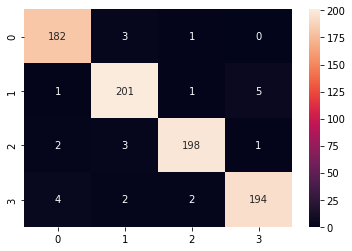

In [ ]:
words = pd.read_csv('words.map', sep = "\t",header = None).to_numpy()

X_train, y_train = readdata('articles.train', words)
X_test, y_test = readdata('articles.test', words)

def split_data(X, y,size):
    arr_rand = np.random.rand(X.shape[0])
    split = arr_rand < np.percentile(arr_rand, (1-size)*100)

    X_train = X[split]
    y_train = y[split]
    X_test =  X[~split]
    y_test = y[~split]

    return X_train, y_train, X_test, y_test

X_train_new, y_train_new,X_val, y_val = split_data(X_train, y_train,0.20)
bernoulli = BernoulliNB(alpha = 0, class_prior = None,fit_prior = False)
clf_alpha0 = bernoulli.fit(X_train_new, y_train_new)
y_pred_new = bernoulli.predict(X_val)

Accuracy1 = accuracy_score(y_val, y_pred_new)

print('Accuracy:', Accuracy1*100, '%')

# Confusion Matrix
sns.heatmap(confusion_matrix(y_val, y_pred_new),annot = True,fmt ='g')

3. Learn the model parameters again by performing Laplace smoothing. Report the new confusion matrix and training accuracy when predicting on the training data. Report another confusion matrix and test accuracy when predicting on the test data

Training data

Train accuracy after Laplace Smoothing is 89.00 %


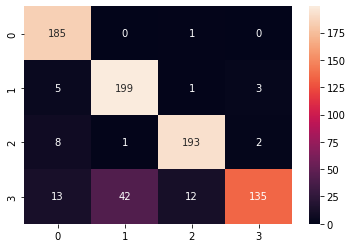

In [ ]:
# Alpha = 1 initiates laplace smoothing
bernoulli = BernoulliNB(alpha = 1, binarize=0.0,class_prior = None, fit_prior = False)
clf_alpha1 = bernoulli.fit(X_train_new, y_train_new)
y_pred_train_b = bernoulli.predict(X_val)
Accuracy = accuracy_score(y_val, y_pred_train_b)
print('Train accuracy after Laplace Smoothing is', format(Accuracy*100,".2f"),'%')
#Confusion matrix
sns.heatmap(confusion_matrix(y_val, y_pred_train_b), annot=True, fmt='g')


Test data

Test accuracy after Laplace Smoothing is 86.92 %


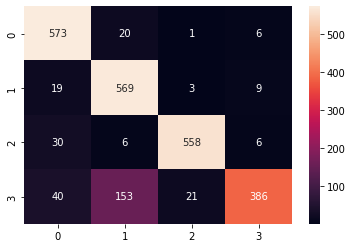

In [ ]:
y_pred_test_b = bernoulli.predict(X_test)
Accuracy = accuracy_score(y_test, y_pred_test_b)
print('Test accuracy after Laplace Smoothing is', format(Accuracy *100,".2f"),'%')

# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_test_b), annot=True, fmt='g')

4.) Redo parts 2 and 3 with the multinomial Naive-Bayes model.

Part 2: Train the Bernoulli Naive-Bayes model based on the training data using MLE. For each class  among 4 different classes, you should learn the parameter , which is the conditional probability 
. You should also learn the parameter , which is the prior probability of each class . Report the confusion matrix and training accuracy by predicting the class labels of the training set by your trained Bernoulli Naive-Bayes model.

Accuracy of Multi class Naive Bayes is 97.375 %


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


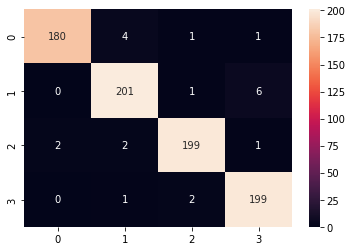

In [ ]:
multi_NB = MultinomialNB(alpha = 0, class_prior = None, fit_prior = False)
clf_alpha0 = multi_NB.fit(X_train_new, y_train_new)
y_pred_train_multi = multi_NB.predict(X_val)
print('Accuracy of Multi class Naive Bayes is {}'.format(accuracy_score(y_val, y_pred_train_multi)*100,'.2f'),'%')
#Confusion matrix
sns.heatmap(confusion_matrix(y_val, y_pred_train_multi),annot = True,fmt ='g')

Part 3: Learn the model parameters again by performing Laplace smoothing. Report the new confusion matrix and training accuracy when predicting on the training data. Report another confusion matrix and test accuracy when predicting on the test data

Training accuracy after Laplace Smoothing is 97.25 %


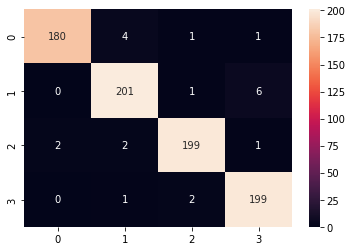

In [ ]:
# Alpha = 1 initiates laplace smoothing
multi_NB = MultinomialNB(alpha = 1,class_prior = None, fit_prior = False)
clf_alpha1 = multi_NB.fit(X_train_new, y_train_new)
y_pred_train_multi_l = multi_NB.predict(X_val)
print('Training accuracy after Laplace Smoothing is {}'.format(accuracy_score(y_val, y_pred_train_multi_l)*100,".2f"),'%')
sns.heatmap(confusion_matrix(y_val, y_pred_train_multi), annot=True, fmt='g')

Test accuracy after Laplace Smoothing is 95.5 %


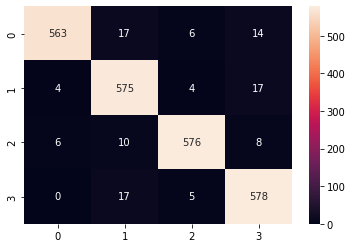

In [ ]:
#Test data
y_pred_test_multi = multi_NB.predict(X_test)
print('Test accuracy after Laplace Smoothing is {}'.format(accuracy_score(y_test, y_pred_test_multi)*100, '.2f'),'%')
sns.heatmap(confusion_matrix(y_test, y_pred_test_multi), annot=True, fmt='g')

5.) Compare and contrast the results from parts 3 and 4. Justify why one works better than the other in our dataset. Explain, in general, the weakness of these Naive-Bayes models by comparing the Bernoulli and the multinomial variants. (Hint: Think about what happen if the same word occurs multiple times in an article)

In [ ]:
Accuracy1 = accuracy_score(y_val, y_pred_train_b)
Accuracy2 = accuracy_score(y_test, y_pred_test_b)
Accuracy3 = accuracy_score(y_val, y_pred_train_multi_l)
Accuracy4 = accuracy_score(y_test, y_pred_test_multi)
print('Training Accuracy of Bernoulli NB Model post Laplace Smoothing is', format(Accuracy1*100,".2f"),'%')
print('Testing Accuracy of Bernoulli NB Model post Laplace Smoothing is',format(Accuracy2*100,".2f"),'%')
print('Training Accuracy of Mutlinomial NB Model post Laplace Smoothing is',format(Accuracy3*100,".2f"),'%')
print('Testing Accuracy of Mutlinomial NB Model post Laplace Smoothing is',format(Accuracy4*100,".2f"),'%')

Training Accuracy of Bernoulli NB Model post Laplace Smoothing is 89.00 %
Testing Accuracy of Bernoulli NB Model post Laplace Smoothing is 86.92 %
Training Accuracy of Mutlinomial NB Model post Laplace Smoothing is 97.25 %
Testing Accuracy of Mutlinomial NB Model post Laplace Smoothing is 95.50 %


We see from the above comparision ; even though the performace is not vastly different between the two , Multinomial performs better than Bernoulli.
Multinomial Naïve Bayes classifier works on the concept of term frequency which means that how many times does the word occur in a document. This model tells two facts that whether the word occur in a document or not as well as its frequency in that document. While predicting the polarity of a new news article, we multiply the probabilities of the occurrence of all the words in the article against both the polarities and the one which is higher gives the polarity of this article.

But on the other hand, Bernoulli Naïve Bayes Classifier works on the binary concept that whether the term occurs in a document or not but unlike Multinomial Naïve Bayes, it does not tell about the term frequency. While predicting the polarity of a new news article, we multiply the probabilities of the occurrence of all the words in the article and also the probabilities of non-occurrence of words which do not occur in the article against both the polarities and the one which is higher gives the polarity of this article.

#2. Hidden Markov Models (3pt)

##1. Count the number of parameters to define the initial distribution, the transition distribution, and the emission distribution.

Initial distribution:
As there are ‘k’ different values in total, we need ‘k’ number of parameters to define the initial distribution.

Transition distribution:
As each state can transform into any of the given ‘k’ states, we need ‘k2’ number of parameters to define the transition distribution.

Emission distribution:
As each of the ‘k’ observations emits ‘m’ number of observations, we need ‘k*m’ number **of** parameters to define the emission distribution.
Thus, total parameters = k + k2 + k*m

##2. Does the number of parameters depend on the number of states? Briefly justify your answer.
No, the number of parameters does not depend on the number of the states because we have 3 hidden states in which each state can take ‘k’ different values and for each states there are ‘m’different observations.

##3. Enumerate all conditional independences holding in this HMM.
Observations Ot are conditionally independent of all other variables given the St , so the observation at time t depends only on the current state St. The St’s form a (first order) Markov chain, i.e., p(St |St-1, ... , S1) = p(St |St-1), t = 2, ...,T.The chain is also typically assumed to be homogeneous in that the transition probabilities do not depend on t. The earliest

##1. Compute the probability of observing the sequence (O1,O2,O3)=(0,1,0) when using the forward algorithm. Try to include both the intermediate equations of values and the final value after computation.

##2. Compute the probability of observing the sequence (O1,O2,O3)=(0,1,0) when using the backward algorithm. Include the intermediate evaluations similarly to part 4.
Given the specific initial, transition, emission distributions and the probabilities, we can compute the probabilities using the backward algorithm as below:


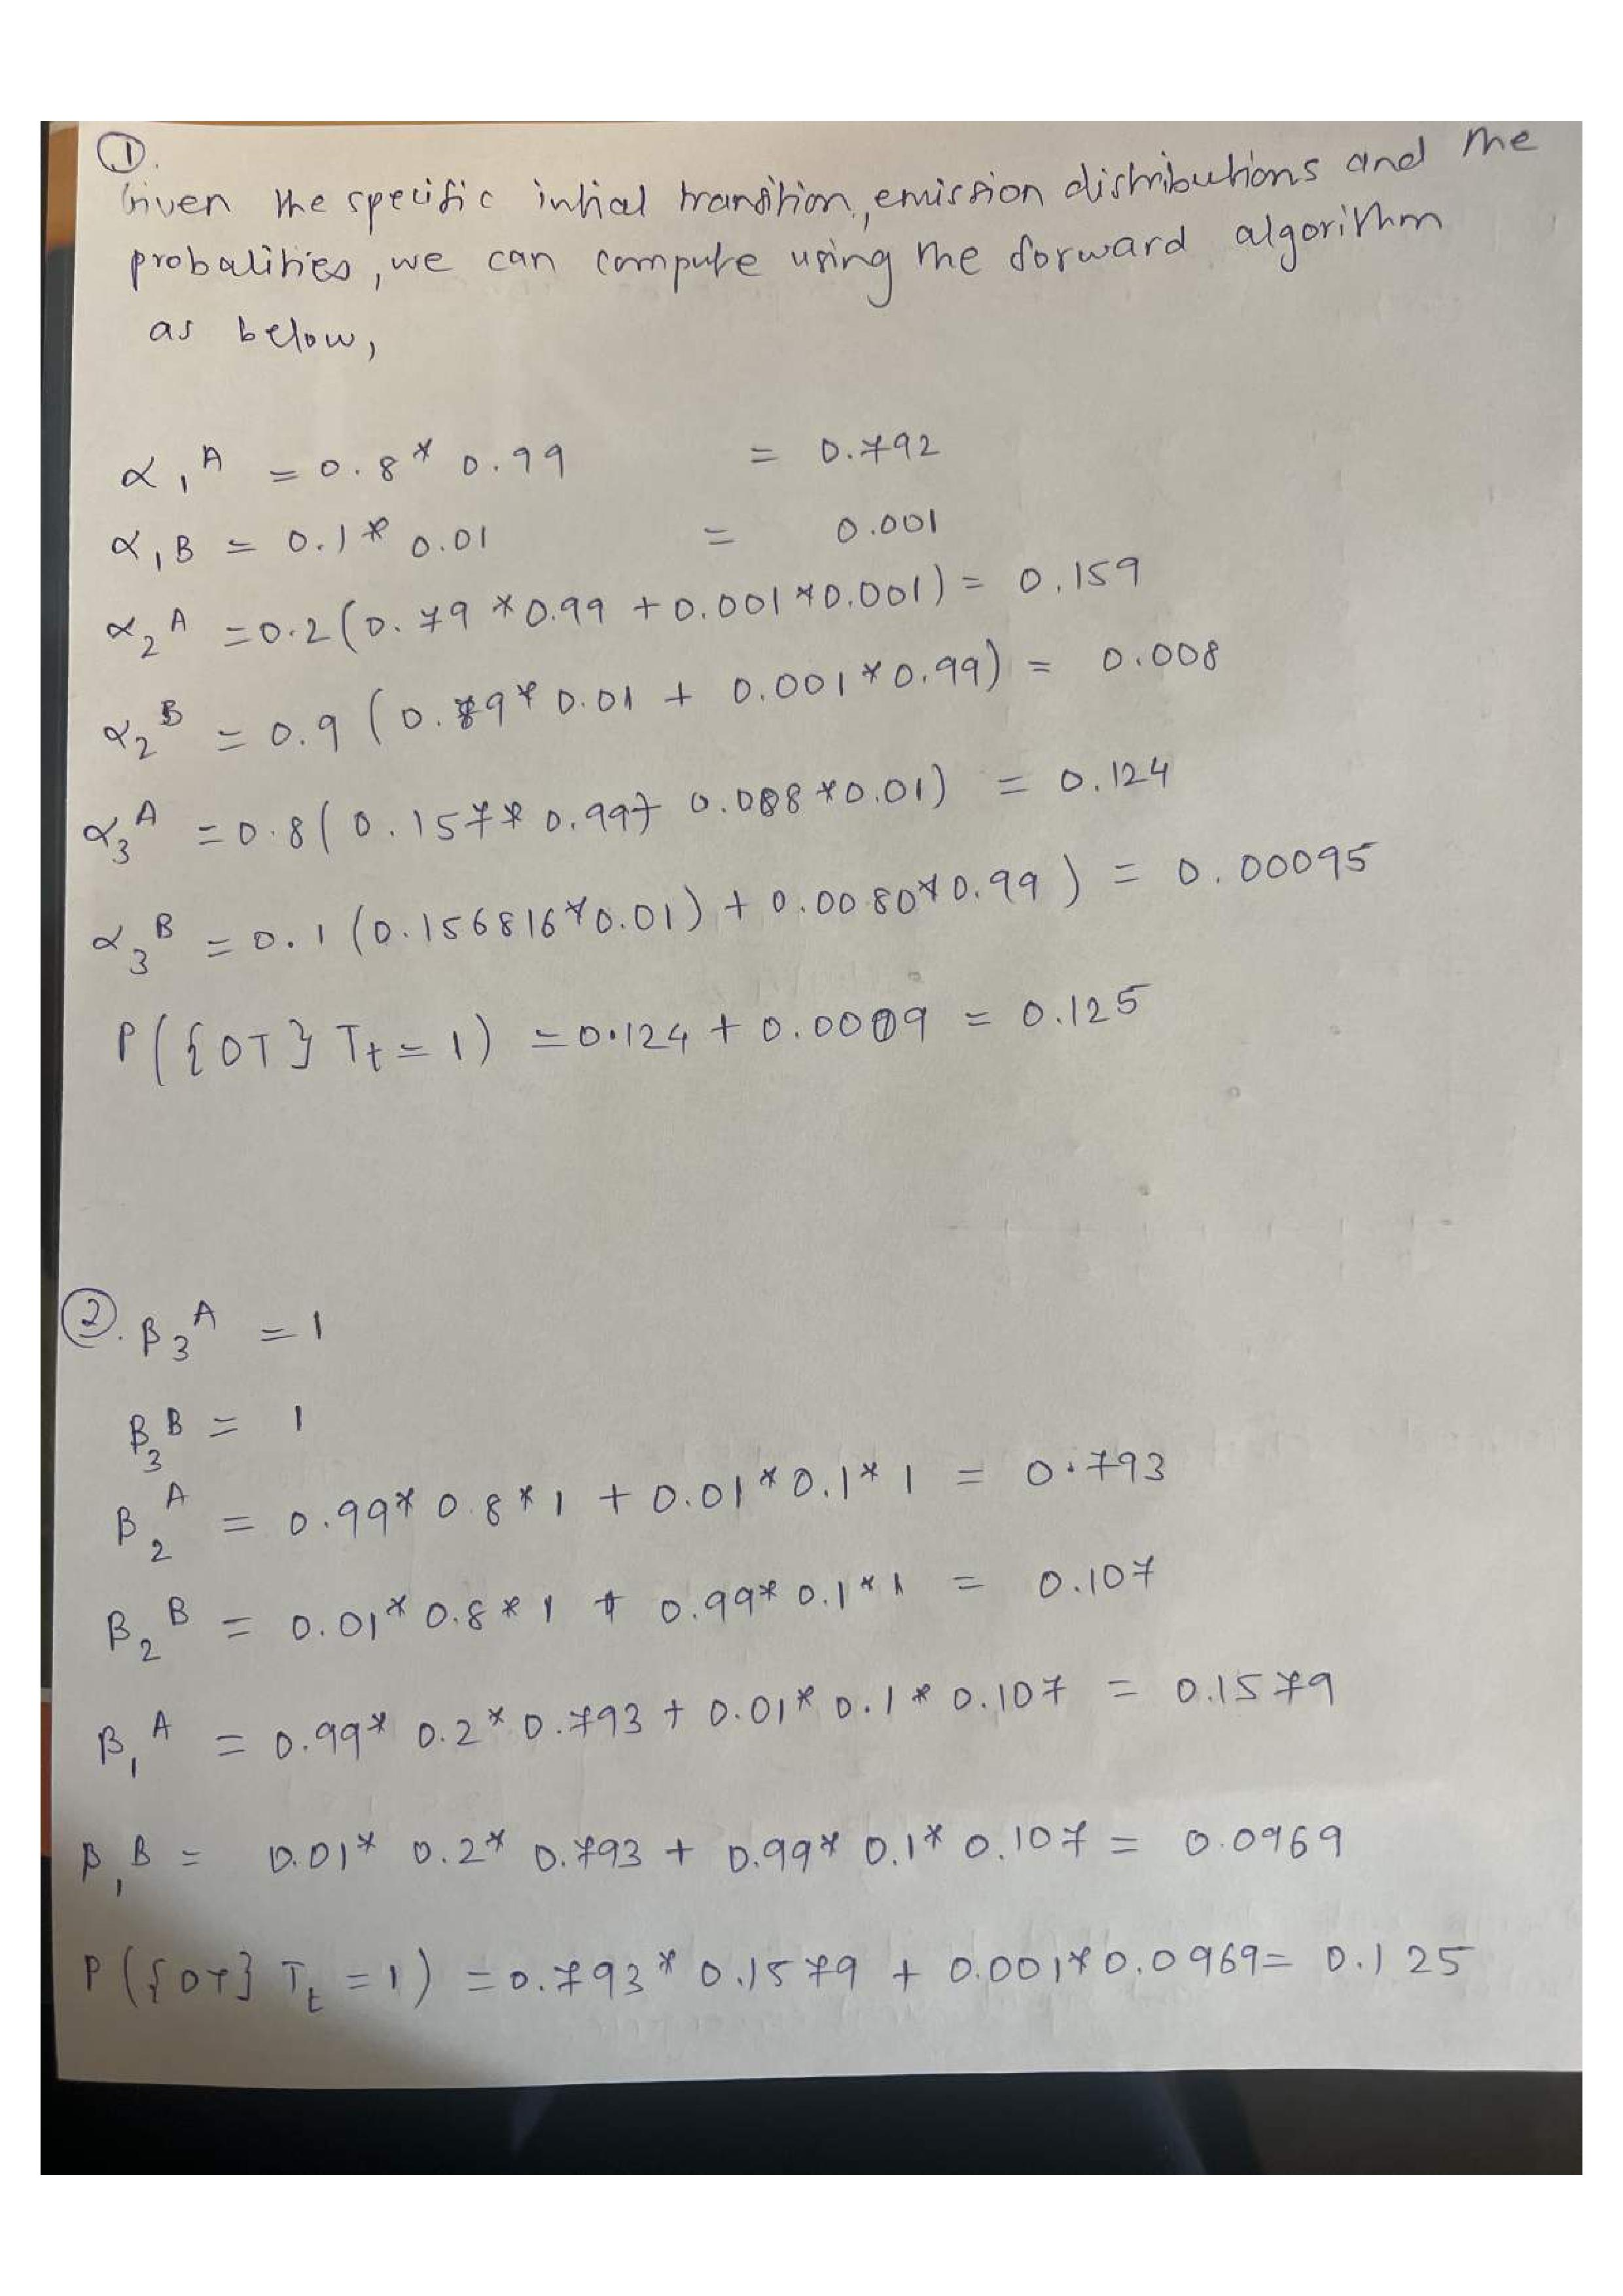




##3. Are the two results from the forward and backward algorithms same? What is the most likely sequence of values for these three states? Note that each state takes a value of either A or B. Include all intermediate evaluations that lead you to your conclusion. (Hint: You can reuse your work in part 4 and 5).

From parts 4&5, we can observe that the results are same. The most likely sequence can be calculated as below:

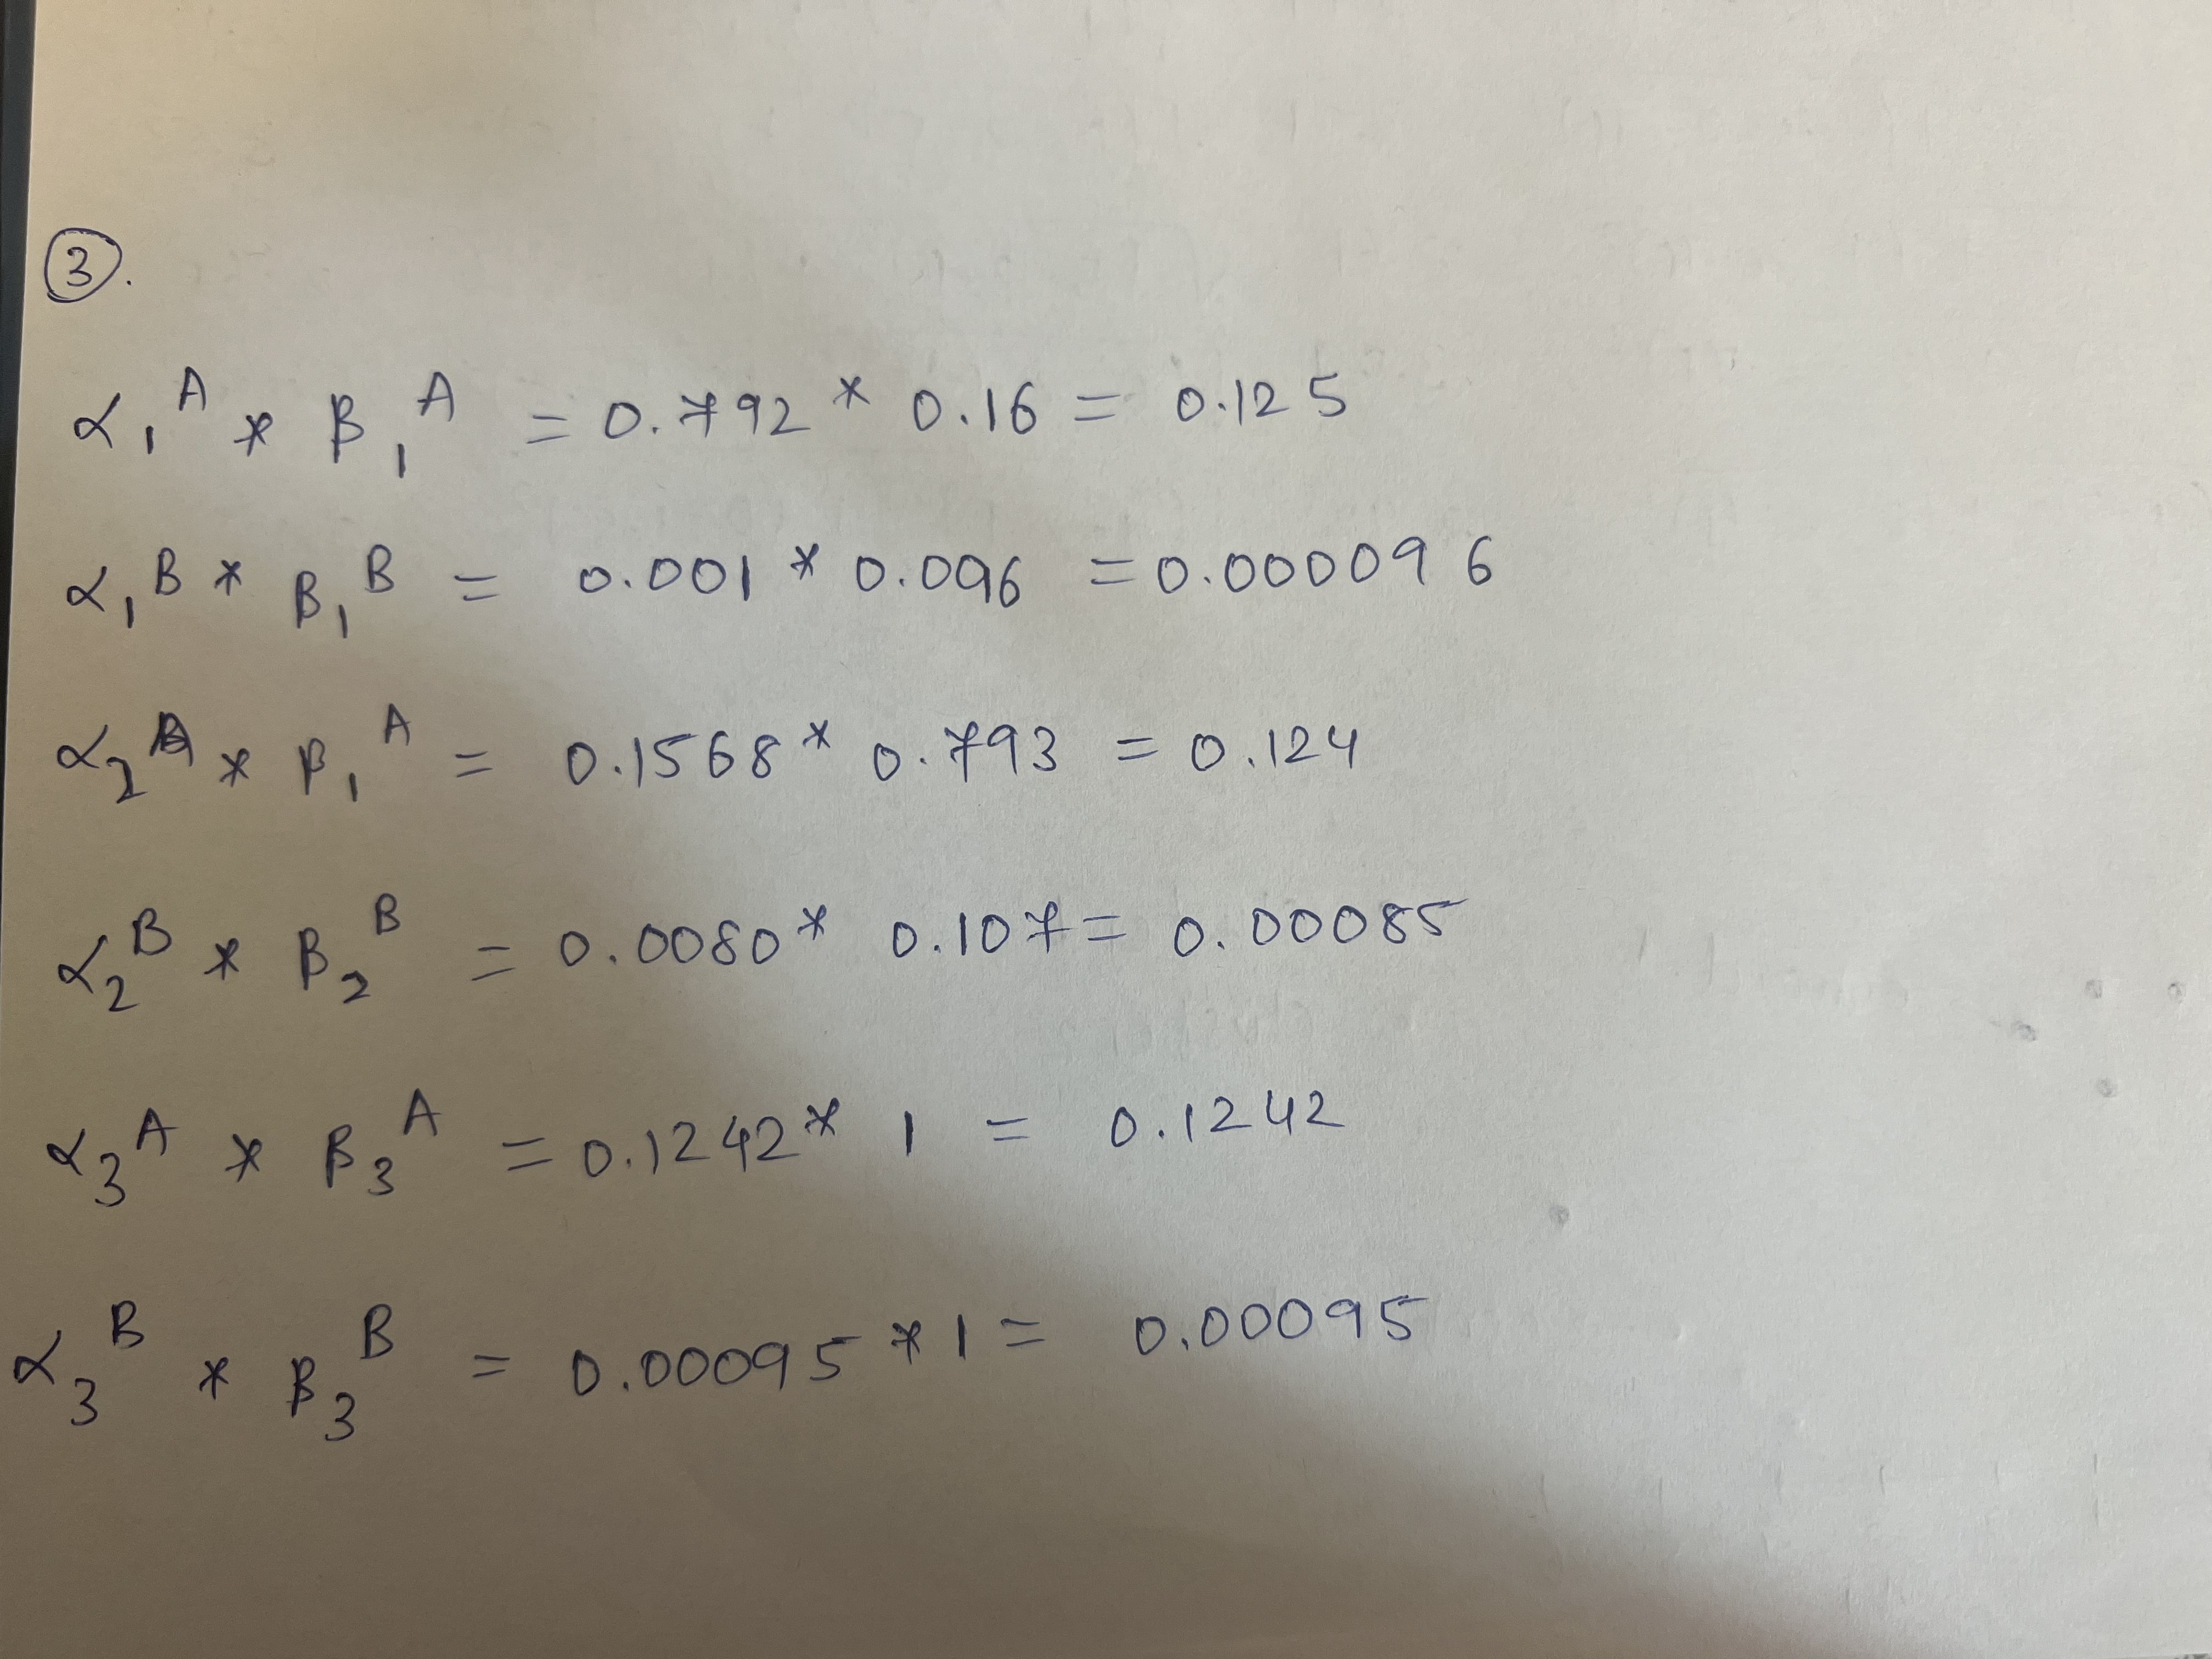

##4. If you use Viterbi algorithm, what is the most likely sequence of values for these three states? Include all intermediate evaluations that lead you to your conclusion.

The Viterbi algorithm forecasts the most likely sequence as below:

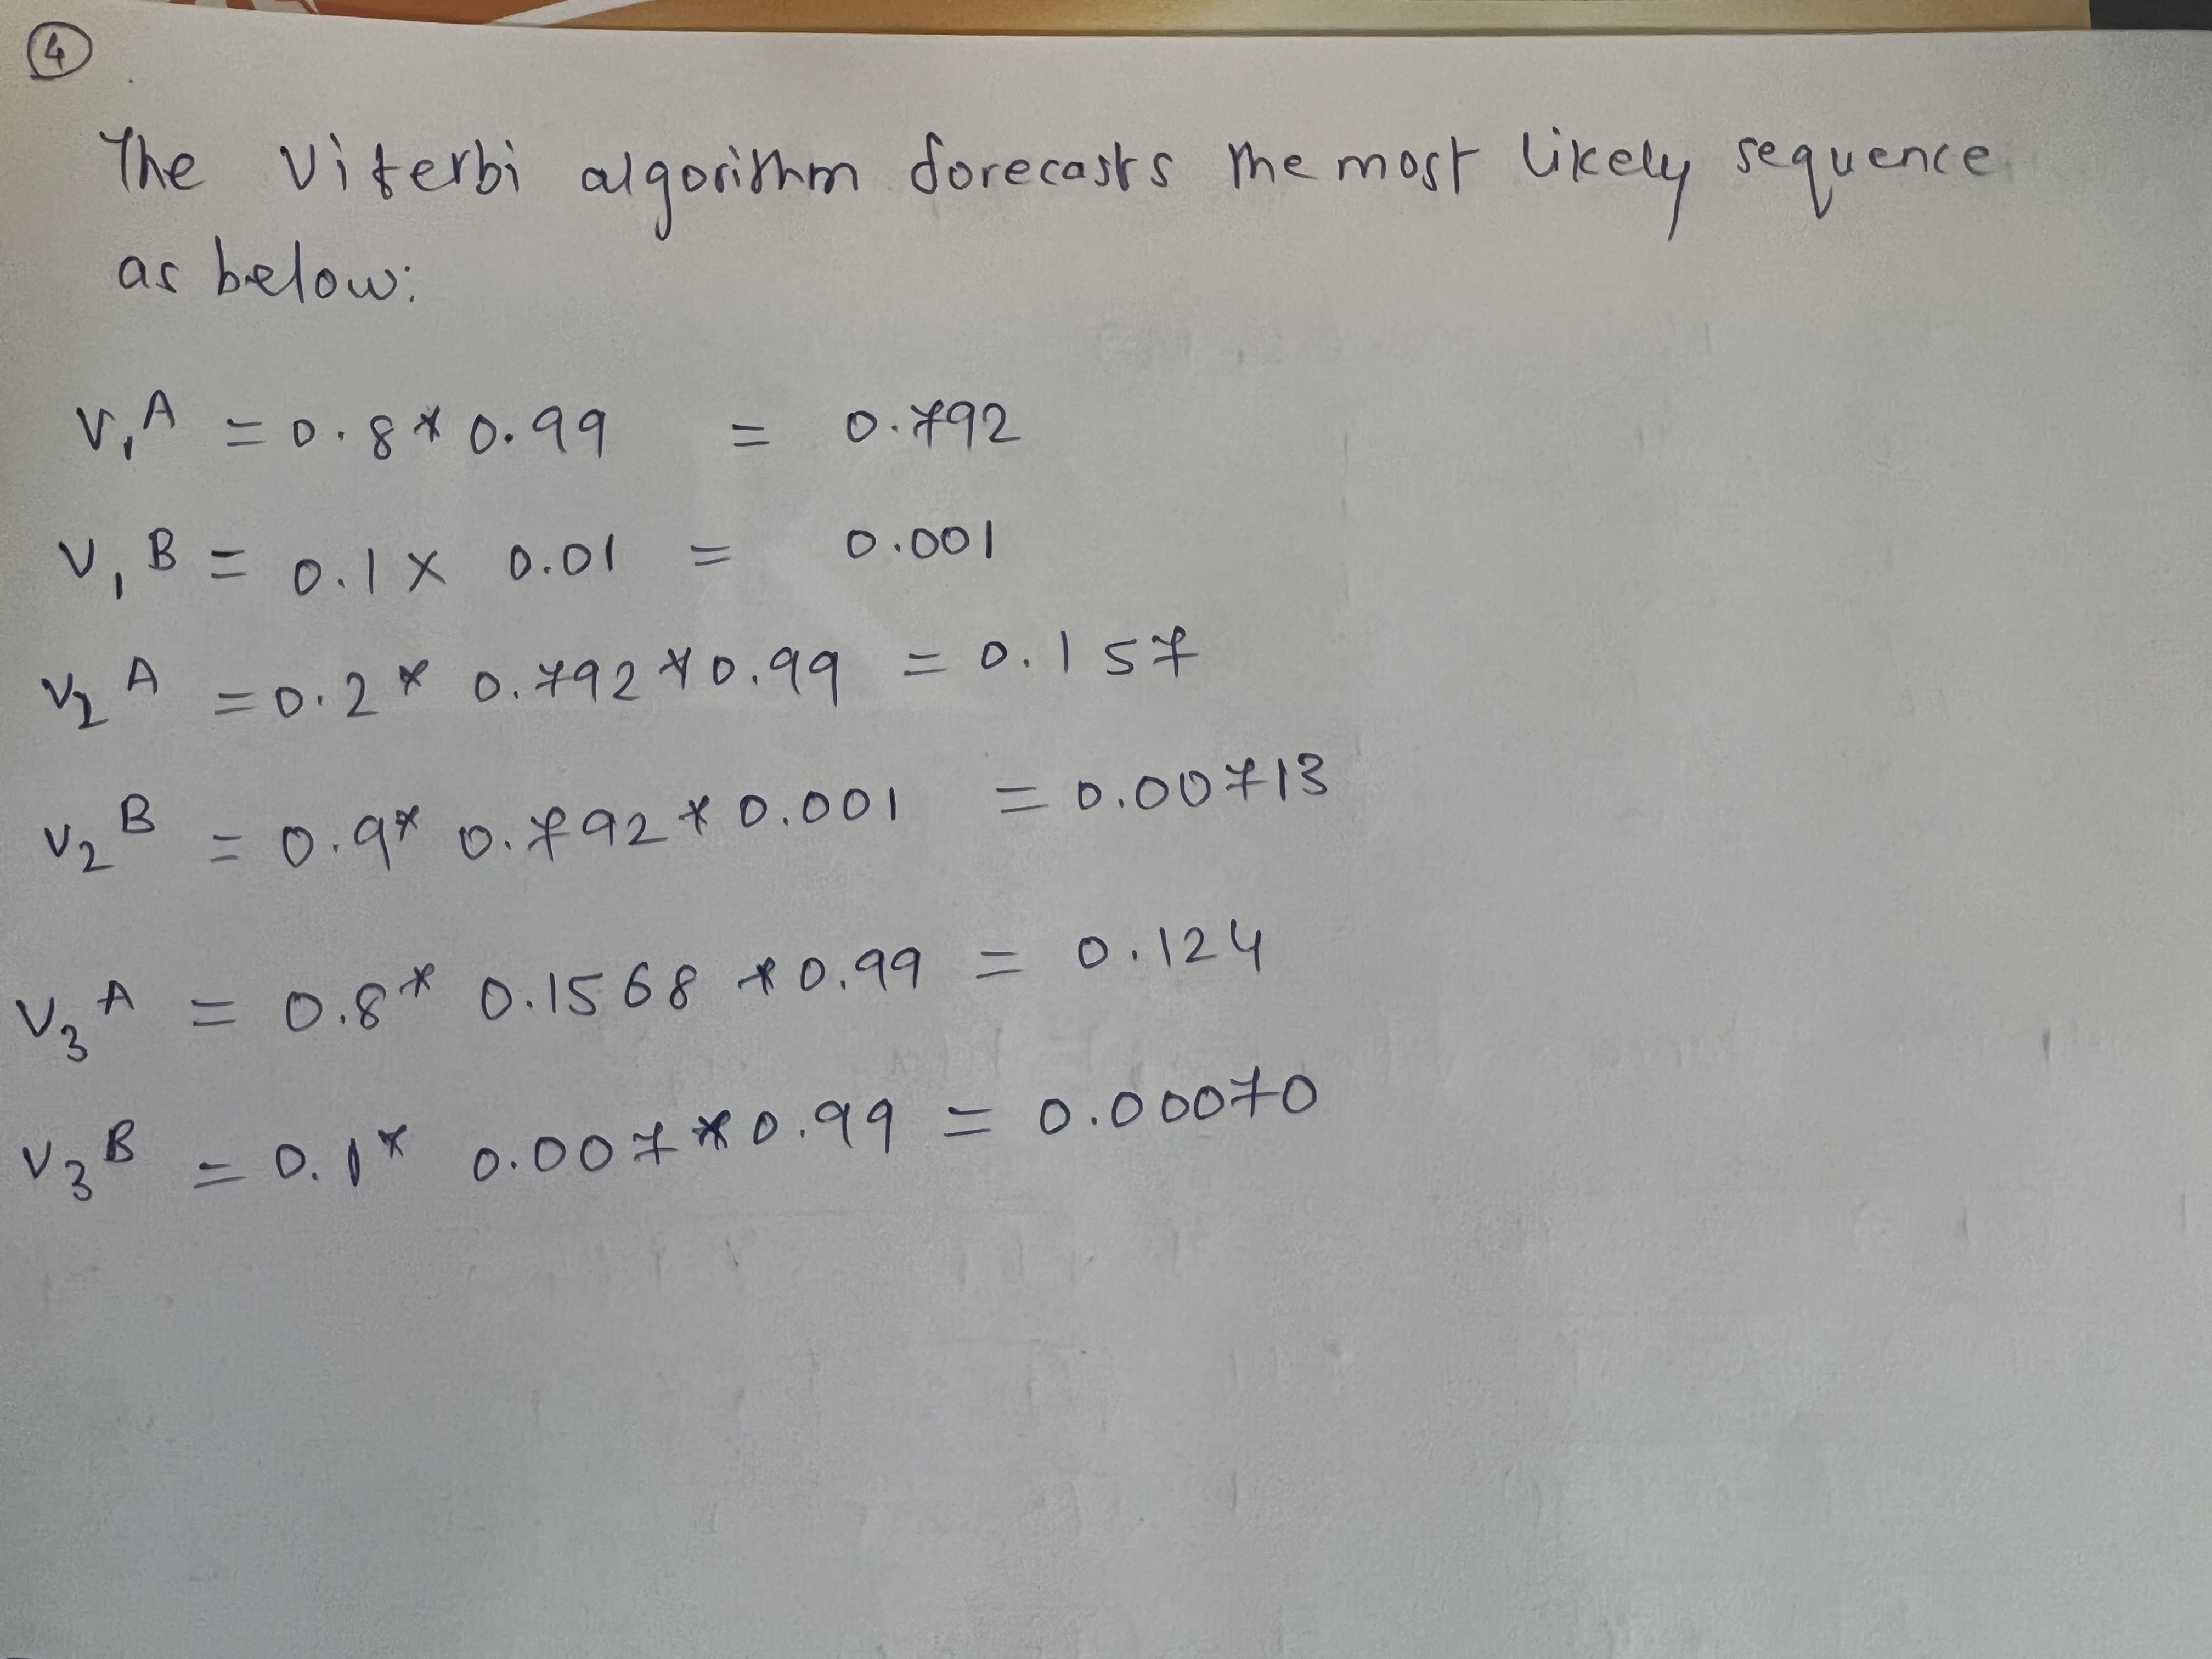

##5. Try to find the most likely sequence of values when considering each state separately (i.e.,by ignoring between-state dependency). Compare whether the resulting sequence of valuesis equivalent to what you have observed in part 6 and 7. Justify why and whether this holds in general.

The values in part 6 & 7 are similar in this case because of the low likelihood of the changing states. But in general, the values won’t need to be same for any case.

#3. K-means Clustering (1.5pt)

Given the following  data points, we will perform K-means clustering with K = 2 below (both manually/step-by-step and automatically). Each example consists of two features and initially assigned to the cluster .

Manually:

1.Plot the data points, and compute the centroid of each cluster.
2.Assign each data point to its closest centroid, reporting the new cluster label .
3.Repeat until convergence. Once the centroids and the cluster labels stop changing, report the cluster label  for each data point.

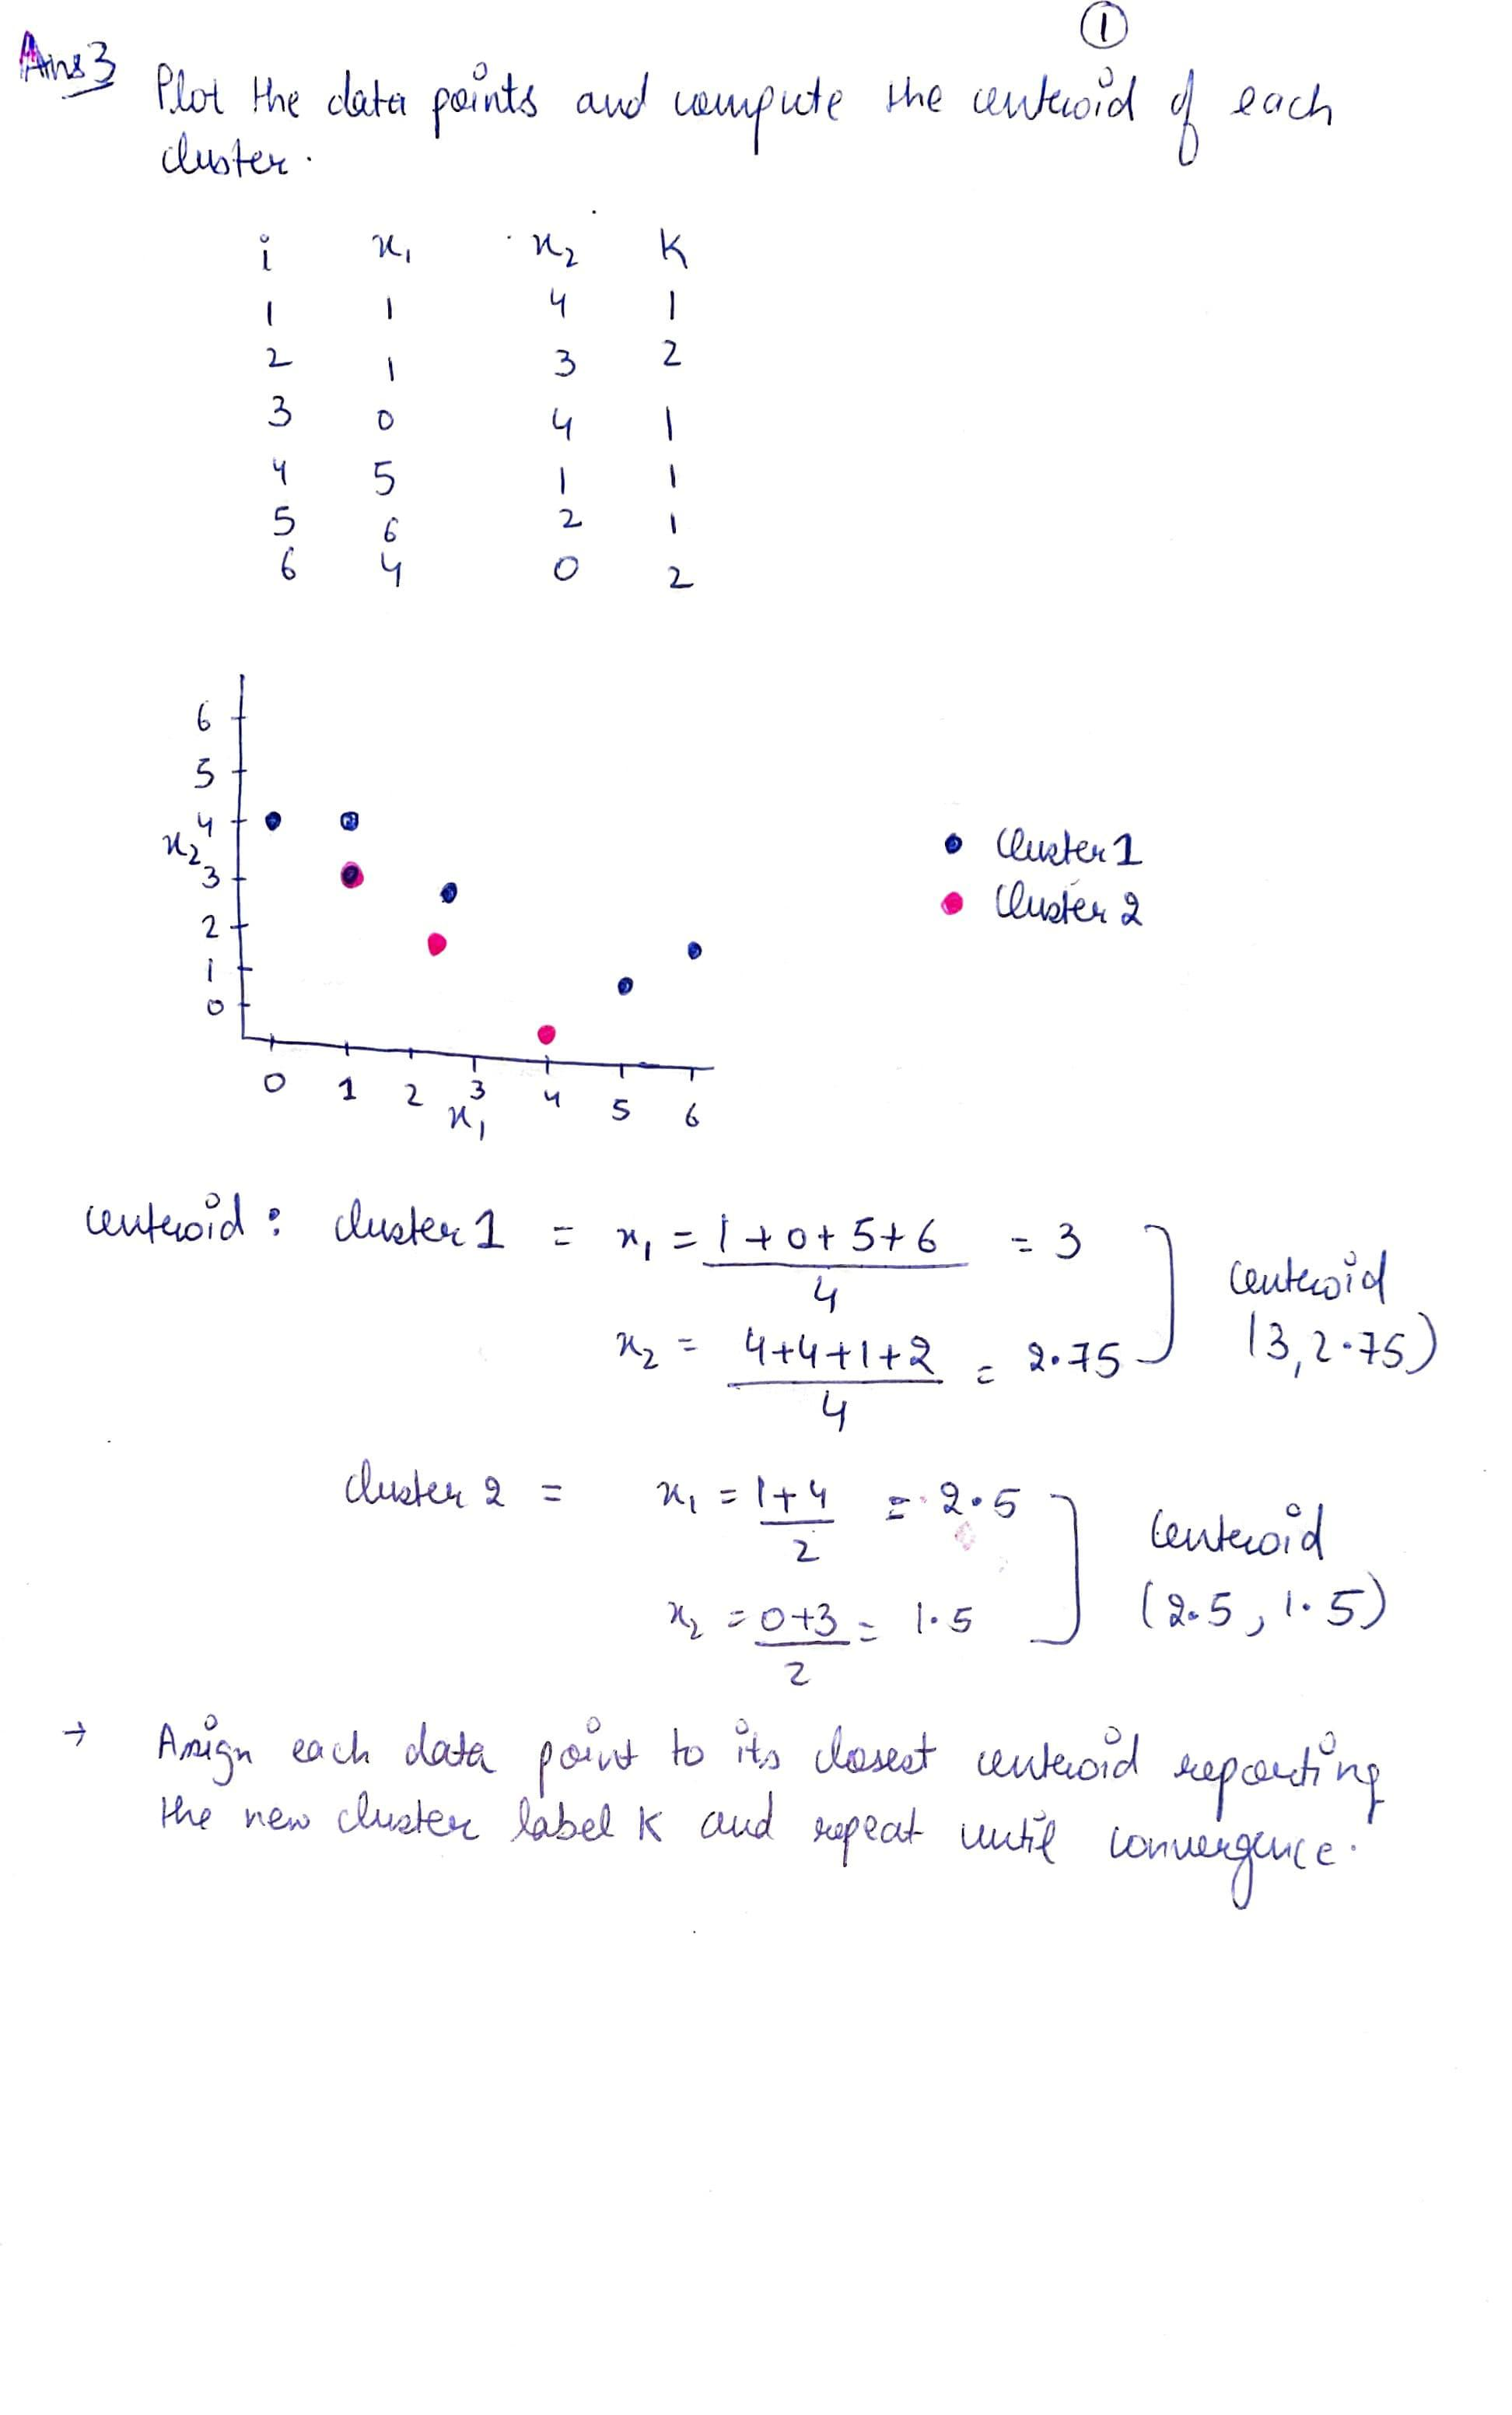


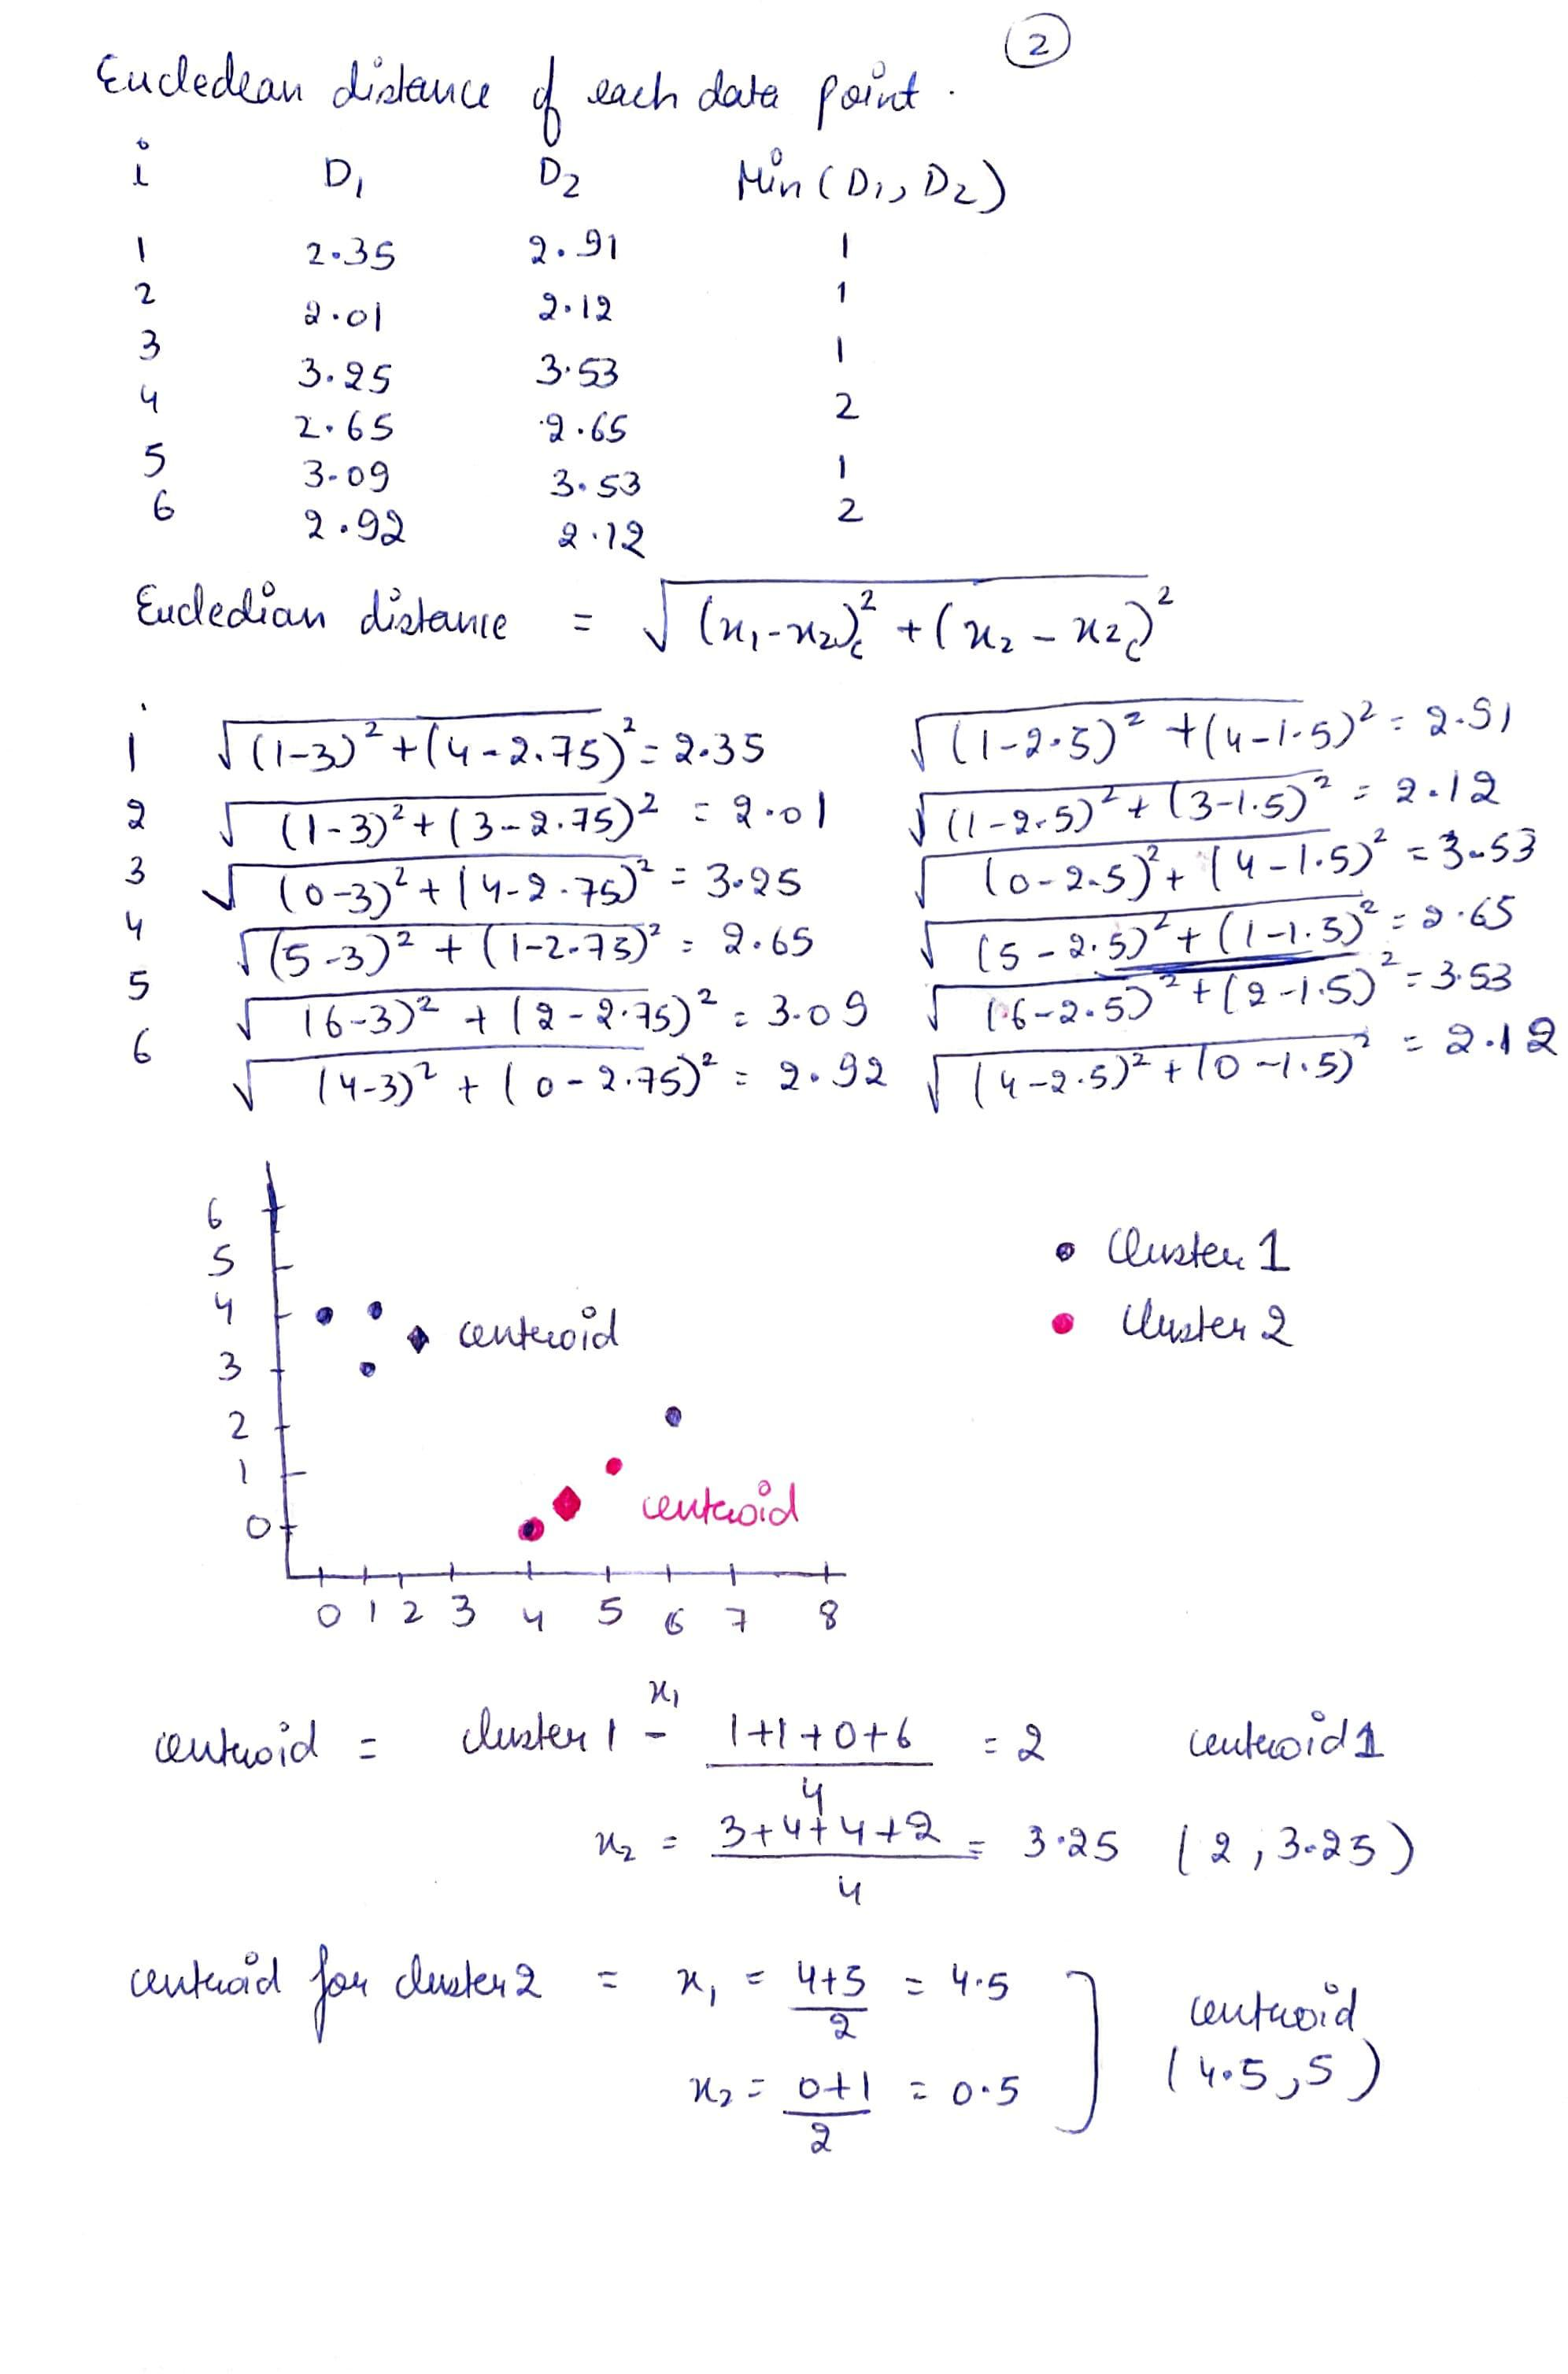


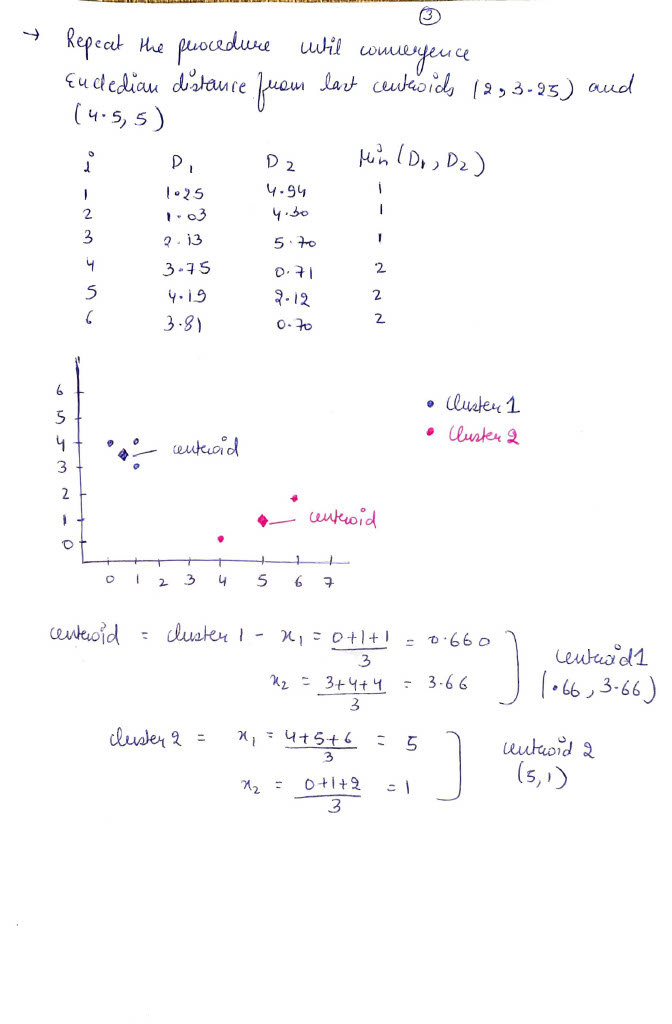

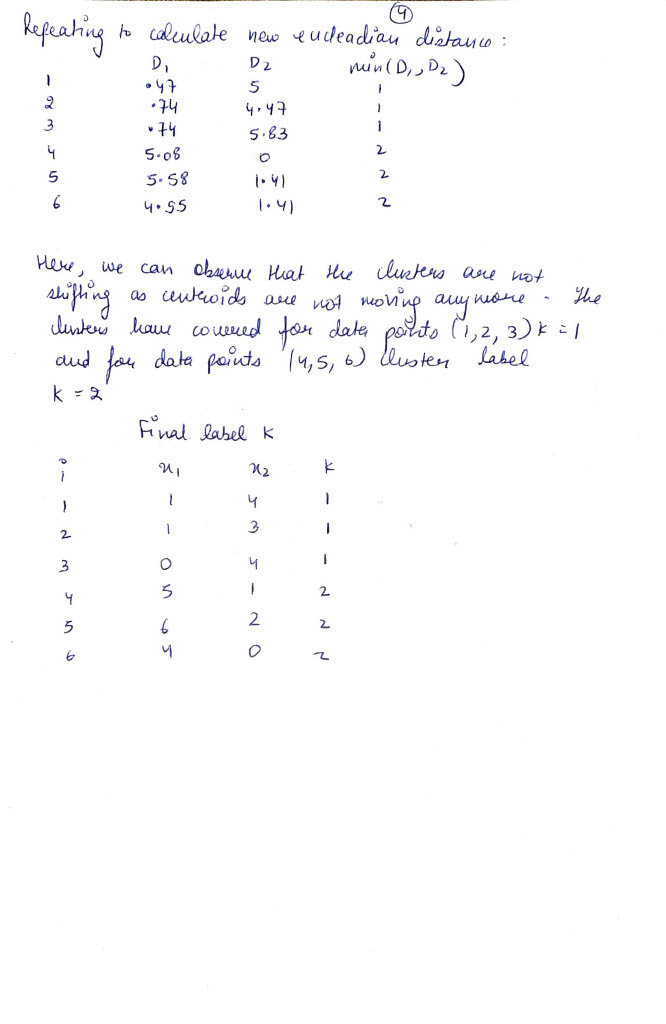

Automatically:

1. Implement K-means from scratch.


2. Check whether the final clustering given by K-means matches your the clustering result obtained in part 1.

 Yes, the final clustering given by K-means matches   the clustering result obtained in part 1.

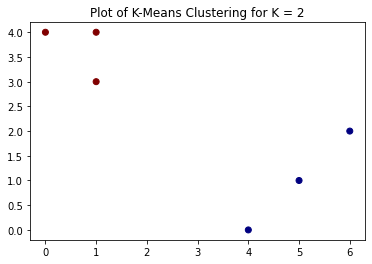

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
a = np.array([[1,4],[1,3],[0,4],[5,1],[6,2],[4,0],])
kmeans = KMeans(n_clusters=2)
kmeans.fit(a)
plt.scatter(a[:,0],a[:,1], c=kmeans.labels_, cmap='jet')
plt.title('Plot of K-Means Clustering for K = 2')
plt.show()

[[5.         1.        ]
 [0.66666667 3.66666667]]
[1 1 1 0 0 0]


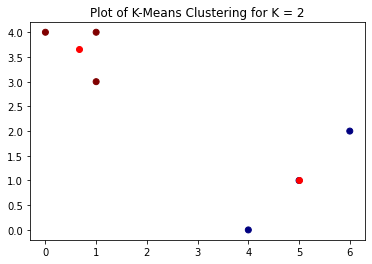

In [ ]:
#Centroid of the cluster
print(kmeans.cluster_centers_)
plt.scatter(a[:,0], a[:,1], c=kmeans.labels_, cmap='jet')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color = 'red')
plt.title('Plot of K-Means Clustering for K = 2')
print(kmeans.labels_)


3. Is the clustering result always same regardeless of the initial cluster assignment for this dataset? In general?

No clustering result is not always the same 
Initial clusters centroid that we assigned do have an effect on the final clustering. In case there is a huge seperate between the clusters 
K means clustering gives us nice convex shapred clusters

#4. Principal Component Analysis and K-means (2.5pt)

In [ ]:
import numpy as np
import pandas as pd

# Class with Mean = 0  with y = 0
x = np.random.normal(loc = 0,  size = (20, 50))
y = np.full((20, 1), 0)
data1 = np.append(x, y, axis =1 )

# Class with Mean = 10 and y = 1
x2 = np.random.normal(loc=10, size =  (20, 50))
y2 = np.full((20, 1), 1)
data2 = np.append(x2, y2, axis =1)

# Class with Mean as 20 and y = 2
x3 = np.random.normal(loc = 20, size = (20, 50))
y3 = np.full((20, 1), 2)
data3 = np.append(x3, y3, axis =1 )


data = pd.DataFrame(np.vstack((data1, data2, data3)))
print(data)

           0          1          2          3          4          5   \
0   -1.304575   1.321852   0.113110   0.709929  -0.027837   2.785739   
1   -1.225311   0.228310   0.744572   0.942844  -0.809470  -0.334768   
2    2.087032   1.552408   0.326733  -0.029311  -0.387228  -1.120389   
3    0.856336   0.307922   0.372127  -0.573984   0.426127   1.224522   
4   -0.361578   0.625550   0.426640   0.346314  -0.371989  -0.976873   
5   -0.961836   0.389971   0.531805   0.446882  -0.547412  -0.810670   
6   -0.353635   0.682179  -1.520484  -1.161873   0.210161  -0.685232   
7   -0.539547  -0.810973  -0.786690   1.668631   1.783524  -0.631690   
8   -0.376929   0.742442   0.012937   0.509364   2.504199  -0.857019   
9   -0.387414   0.835407   0.601526  -0.047968  -0.404278  -0.015637   
10  -0.828684   0.306038  -2.087716  -0.734089   0.421112   1.154503   
11   2.331990   0.237433   1.491034  -0.001985  -0.012269  -0.370676   
12   1.246618   0.212191   0.365845  -1.018491  -2.019702  -0.48

1. Run PCA on these 60 data points. Plot the first two principle axes. Try to use different colors to contrast the data points that belong to different classes. If the three classes are distinctive enough, continue to the next part. Otherwise keep synthesizing a new dataset until you reach at some degree of separations across three classes in terms of the two principal component axes.

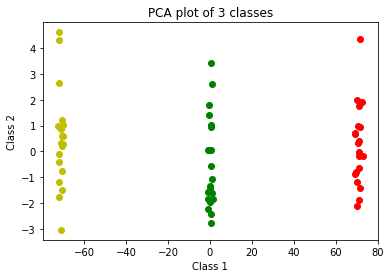

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

PCA_Analysis = PCA(n_components=2)
component = PCA_Analysis.fit_transform(data)
df = pd.DataFrame(component, columns=['class1', 'class2'])
df['labels'] = data[[50]]

plt.plot(df[:20]['class1'], df[:20]['class2'], "ro")
plt.plot(df[20:40]['class1'], df[20:40]['class2'], "go")
plt.plot(df[40:59]['class1'], df[40:59]['class2'], "yo")

plt.ylabel("Class 2")
plt.xlabel("Class 1")
plt.title("PCA plot of 3 classes")
plt.show()


2. Run K-means clustering with K = 3. Compare the obtained clusters to the true class labels. (Hint: Note that K-means clustering only separates without assigning particular label values. Use normalized mutual information to compare.)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import normalized_mutual_info_score

def kmeansclustering(number_of_clusters,data ):
  k_means_x = data.loc[:, data.columns.drop(50)]
  K_means_model = KMeans(n_clusters=number_of_clusters, random_state=0).fit(k_means_x)
  predictions = K_means_model.predict(k_means_x)
  final = normalized_mutual_info_score(data[50] , K_means_model.labels_ )
  print('Accuracy:' ,(format(final*100, ".2f")),'%')

kmeansclustering(3 ,data)

Accuracy: 100.00 %


3. Run K-means clustering with K = 2 and 4. Explain your results in contrast to part 2.


In [ ]:
# For K = 2
def kmeansclustering(number_of_clusters,data ):
  k_means_x = data.loc[:, data.columns.drop(50)]
  K_means_model = KMeans(n_clusters=number_of_clusters, random_state=0).fit(k_means_x)
  predictions = K_means_model.predict(k_means_x)
  final = normalized_mutual_info_score(data[50] , K_means_model.labels_ )
  print('Accuracy:' ,(format(final*100, ".2f")),'%')
kmeansclustering(2 ,data)

Accuracy: 73.37 %


In [ ]:
#For K = 4
kmeansclustering(4 ,data)

Accuracy: 90.74 %


We notice that accuracy of the model wis low for k=2 and higher for k = 4

4. Now run K-means clustering with K = 3 only on the two principal axes that you discovered in part 1. In other words, run K -means clustering on  matrix. Explain your result in comparison to the previous results.

In [ ]:
#For K = 3
modifiedkmeansmodel = KMeans(n_clusters=3)
modifiedkmeansmodel.fit(df[['class1', 'class2']])
modified_kmeans_model_prediction = modifiedkmeansmodel.predict(df[['class1', 'class2']])
final = normalized_mutual_info_score(data[50] , modifiedkmeansmodel.labels_ )
print("Accuracy", (format(final*100, ".2f")),"%" )

Accuracy 100.00 %


5. Implement standardizing from scratch (make each feature have a standard deviation of 1, and do not remove the existing mean shift in each feature). Given the original  data that you worked on part 2, run K-means clustering with K = 3 after standardizing each feature. Explain your result in comparison to the results of part 2.

In [ ]:
# Class with Mean = 0 with standard Deviation as 1 and y=0
x1 = np.random.normal(loc = 0, scale=1, size = (20, 50))
y1 = np.full((20, 1), 0)
data1 = np.append(x1, y1, axis =1)


# Class with Mean as 10 with standard Deviation as 1  and y=1
x2 = np.random.normal(loc= 10, scale=1, size =  (20, 50))
y2 = np.full((20, 1), 1)
data2 = np.append(x2, y2, axis =1 )


# Class with Mean as 20 with standard Deviation as 1  and y=2
x3 = np.random.normal(loc = 20,  scale=1, size = (20, 50))
y3 = np.full((20, 1), 2)
data3 = np.append(x3, y3, axis =1 )

data = pd.DataFrame(np.vstack((data1, data2, data3)))
print(data)

           0          1          2          3          4          5   \
0   -0.213463  -0.186140   0.035722   0.162112   0.986628   0.225969   
1   -0.016307   0.687464   0.639286  -0.133178  -0.779809  -0.233261   
2    0.395617   1.280485   0.849510  -0.146802   0.719287   0.658356   
3    0.561991  -1.265306   0.870716   2.090304  -1.229391   0.213454   
4    0.941143   1.298104  -1.130641   0.322512   0.835773  -2.410931   
5    0.674246   0.020876  -0.808908   1.691612  -0.533410   1.783397   
6   -1.164484   0.221694  -0.043402  -1.571044   0.552086  -0.560576   
7    0.383463   0.366921   0.446763  -0.063258   0.390767  -0.168881   
8    0.681198   1.055033   0.414949   0.929998   2.280367  -1.264371   
9    2.023465   0.126669  -0.069415   1.432675   0.288640   1.169465   
10   0.119107   1.423194  -1.018930   0.550744   1.539487   1.295442   
11   0.120897  -0.676428   0.330192  -0.490427  -0.854582   0.235339   
12   0.321232   0.251717  -0.034671  -0.041980  -0.971947   0.00

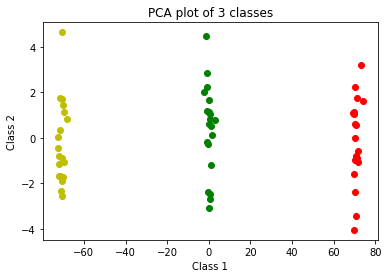

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA for n = 2
PCA_Analysis = PCA(n_components=2)
components = PCA_Analysis.fit_transform(data)
df = pd.DataFrame(components, columns=['class1', 'class2'])
df['labels'] = data[[50]]

plt.plot(df[:20]['class1'], df[:20]['class2'], "ro")
plt.plot(df[20:40]['class1'], df[20:40]['class2'], "go")
plt.plot(df[40:59]['class1'], df[40:59]['class2'], "yo")

plt.ylabel("Class 2")
plt.xlabel("Class 1")
plt.title("PCA plot of 3 classes")
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import normalized_mutual_info_score

def kmeansclustering(number_of_clusters,data ):
  k_means_x = data.loc[:, data.columns.drop(50)]
  K_means_model = KMeans(n_clusters=number_of_clusters, random_state=0).fit(k_means_x)
  predictions = K_means_model.predict(k_means_x)
  final = normalized_mutual_info_score(data[50] , K_means_model.labels_ )
  print("Accuracy:",(format(final*100, ".2f")),"%" )

kmeansclustering(3 ,data)

Accuracy: 100.00 %


Accuracy of model is same even compared to part 2 when if we include standard deviation = 1 